# LYBRARIES

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
#import visualkeras
import os
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

# READ TO DATASET

In [2]:
train_path = "./train/"
test_path = "./val/"

## EXPLORATORY DATASET

In [3]:
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  4


## EXPLORATORY DATA ANALISYS TWO (sample image)

In [4]:
def sampleImage(sampe_image_path):
  img = load_img(train_path + sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

### COVID 19


(271, 361, 3)


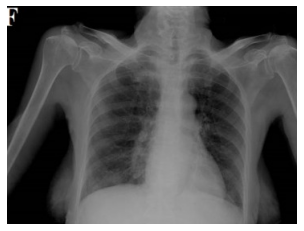

In [5]:
sample_image_path = "COVID19/COVID19(16).jpg"
sampleImage(sample_image_path)

### NORMAL

(1858, 2090, 3)


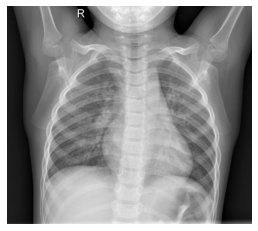

In [14]:
sample_image_path="NORMAL/IM-0115-0001.jpeg"
sampleImage(sample_image_path)

### PNEUMONIA


(439, 712, 3)


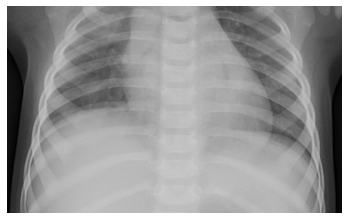

In [19]:
sample_image_path="PNEUMONIA/person1_bacteria_1.jpeg"
sampleImage(sample_image_path)

### COVID 19


(512, 512, 3)


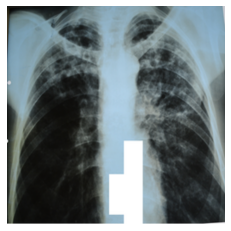

In [22]:
sample_image_path = "TURBERCULOSIS/Tuberculosis-441.png"
sampleImage(sample_image_path)

    Observamos que los distintos tipos de entradas tienen dimenciones distintas y Formatos DISTINTOS *
#
# DATA PREPROSESING

In [5]:
labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

In [6]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('./','train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('./','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 41/41 [00:00<00:00, 57.31it/s]


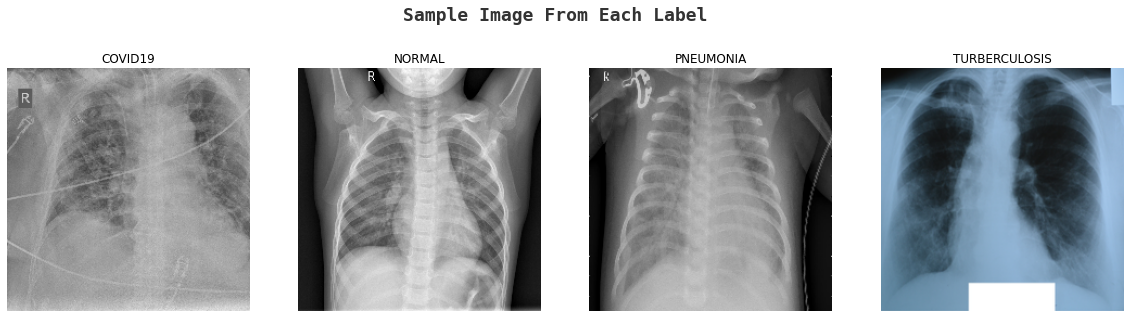

In [7]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [8]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)
X_train.shape

(7097, 224, 224, 3)

### DIVIDING THE DATASSET IN TRAIN AND TEST

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

### Performing One Hot Encoding on the lables after converting it into numerical values

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# BUILDING EFICIENET


In [11]:
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

### LAyers from efficcientNET

In [12]:
efficientNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

## Visualize of the efficientNEt

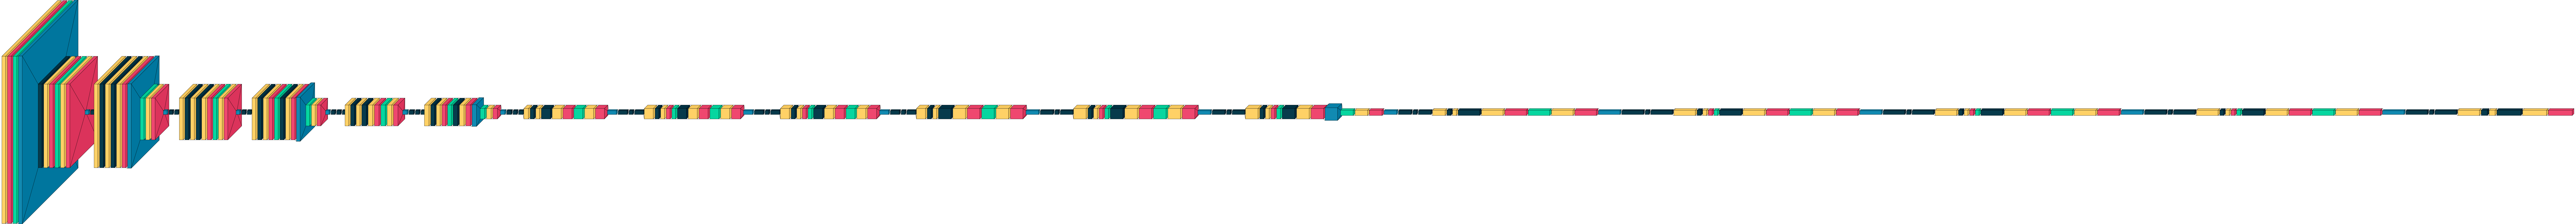

In [11]:
visualkeras.layered_view(efficientNet)

In [14]:
model = efficientNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(numberOfClass,activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = model)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

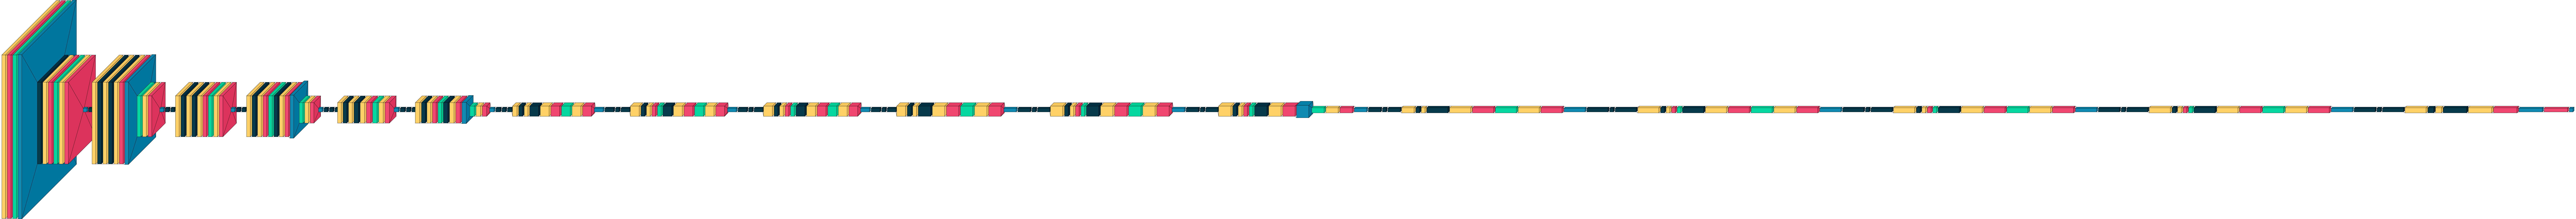

In [37]:
visualkeras.layered_view(model)

## Compiling The Model

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam', 
              metrics= ['accuracy'])

In [16]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("CovidModelEfficientNet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.3, 
                              patience = 2, 
                              min_delta = 0.001,
                              mode='auto',verbose=1)

## Training The Model

In [17]:
hist = model.fit(X_train,
                 y_train,
                 validation_split=0.1, 
                 epochs =15, 
                 verbose=1, 
                 batch_size=32,
                  callbacks=[tensorboard,checkpoint,reduce_lr]
                 )

Epoch 1/15
180/180 [==============================] - ETA: 0s - loss: 0.1951 - accuracy: 0.9323
Epoch 00001: val_accuracy improved from -inf to 0.92175, saving model to CovidModelEfficientNet.h5
180/180 [==============================] - 633s 3s/step - loss: 0.1951 - accuracy: 0.9323 - val_loss: 0.3643 - val_accuracy: 0.9218 - lr: 0.0010
Epoch 2/15
180/180 [==============================] - ETA: 0s - loss: 0.0883 - accuracy: 0.9680
Epoch 00002: val_accuracy did not improve from 0.92175
180/180 [==============================] - 605s 3s/step - loss: 0.0883 - accuracy: 0.9680 - val_loss: 0.3726 - val_accuracy: 0.9014 - lr: 0.0010
Epoch 3/15
180/180 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.9697
Epoch 00003: val_accuracy improved from 0.92175 to 0.96870, saving model to CovidModelEfficientNet.h5
180/180 [==============================] - 620s 3s/step - loss: 0.0826 - accuracy: 0.9697 - val_loss: 0.1246 - val_accuracy: 0.9687 - lr: 0.0010
Epoch 4/15
180/180 [=

In [11]:
## do not run this code
from keras.models import load_model 
model2 = load_model('CovidModelEfficientNet.h5')
results = model2.evaluate(X_test,y_test)



23/23 [==============================] - 12s 79ms/step - loss: 0.2924 - accuracy: 0.8930


In [12]:
results = model.evaluate(X_train,y_train)

NameError: name 'model' is not defined

In [32]:
results = model.evaluate(X_test,y_test)

23/23 [==============================] - 16s 704ms/step - loss: 0.0224 - accuracy: 0.9930


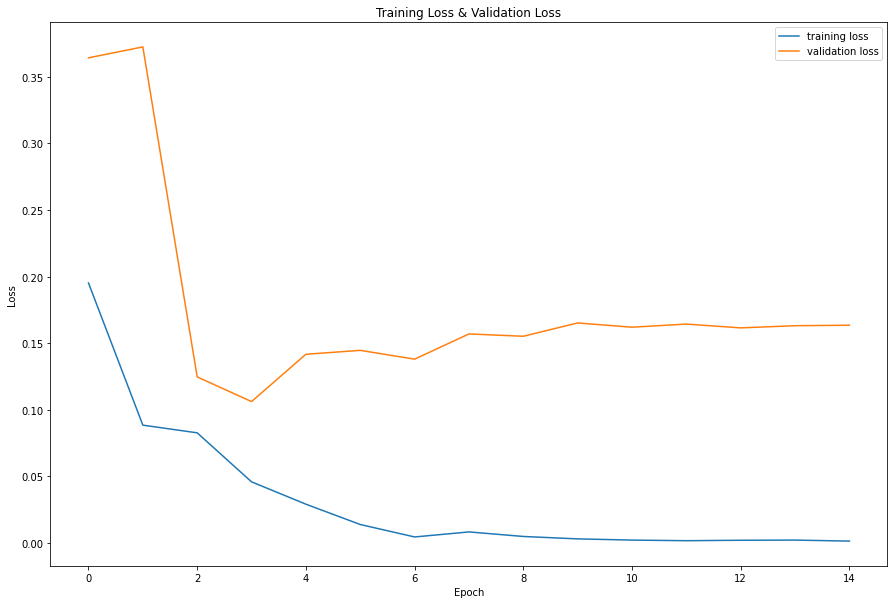

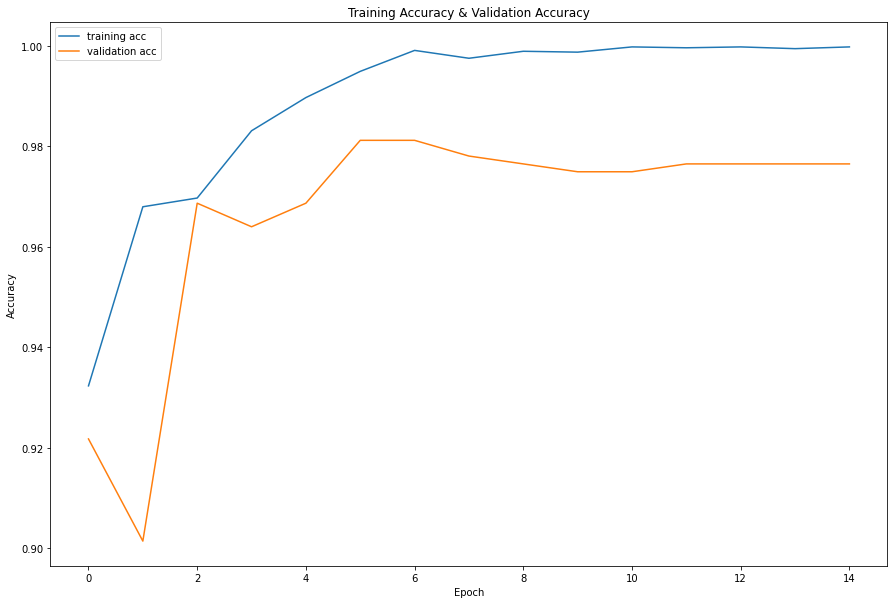

In [22]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Clasification REport

In [13]:
pred = model2.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)


print(classification_report(y_test_new,pred,target_names=labels))

               precision    recall  f1-score   support

      COVID19       0.98      0.74      0.84        61
       NORMAL       0.99      0.68      0.81       174
    PNEUMONIA       0.88      0.99      0.93       411
TURBERCULOSIS       0.75      1.00      0.86        64

     accuracy                           0.89       710
    macro avg       0.90      0.85      0.86       710
 weighted avg       0.91      0.89      0.89       710



## Confucion Matrix

[[ 60   0   1   0]
 [  0 172   2   0]
 [  0   2 409   0]
 [  0   0   0  64]]


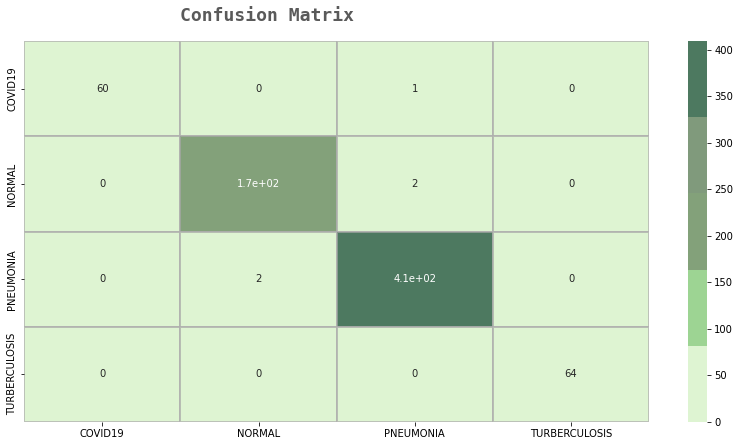

In [24]:
#colors
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']


fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(y_test_new,pred),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(y_test_new,pred))
plt.show()

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4417479795447436208
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4159700992
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3591437208849273200
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
import tensorflow as tf

model = tf.keras.models.load_model('CovidModelEfficientNet.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model_zip.tflite", "wb").write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\azrae\AppData\Local\Temp\tmp3_podm4z\assets


16045844

'LS' is not recognized as an internal or external command,
operable program or batch file.
